# Machine Learning App R
## Zianne Olverson

In [1]:
install.packages("caret")

Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
install.packages("ggplot2")
install.packages("lattice")
install.packages("e1071")
install.packages("klaR")
install.packages("rpart")
install.packages("nnet")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
install.packages("randomForest")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
install.packages("labelled")
install.packages("questionr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
install.packages("ranger")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [6]:
install.packages("klaR")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [7]:
install.packages("stringi")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
library(stringi)
library(caret)
library(ggplot2)
library(lattice)
library(e1071)
library(randomForest)
library(klaR)
library(rpart)
library(nnet)

Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: MASS



# Attaching the iris dataset to the environment

In [9]:
data(iris)
dataset <- iris

# Defining the filename

In [10]:
filename <- "iris.csv"

# Load the CSV file from the local directory

In [11]:
dataset <- read.csv(filename, header=FALSE)

# Setting the column names in the dataset

In [12]:
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

# Creating validation

# Creating a list of 80% of the rows in the original dataset to be used for training

In [13]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

# Select 20% of the data for validation

In [14]:
validation <- dataset[-validation_index,]

# Using the remaining 80% of data to training and testing the models

In [15]:
dataset <- dataset[validation_index,]

# Data dimensions

In [16]:
dim(dataset)

[1] 120   5

# Listing types for each attribute

In [17]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"  "character"

# First 5 rows of the data

In [18]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


# Listing the levels for the class

In [19]:
str(dataset$Species)
class(dataset$Species)
dataset$Species <- as.factor(dataset$Species)
levels(dataset$Species)

 chr [1:120] "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...


[1] "character"

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

# Summarization of class distribution

In [20]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


# Summary of statistical distributions

In [21]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.275  
 Median :5.700   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.846   Mean   :3.056   Mean   :3.759   Mean   :1.201  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

# Visualizing the dataset

## Univariate Plotting

# Split of input and output

In [22]:
x <- dataset[,1:4]
y <- dataset[,5]

# Boxplot for each attribute on one image

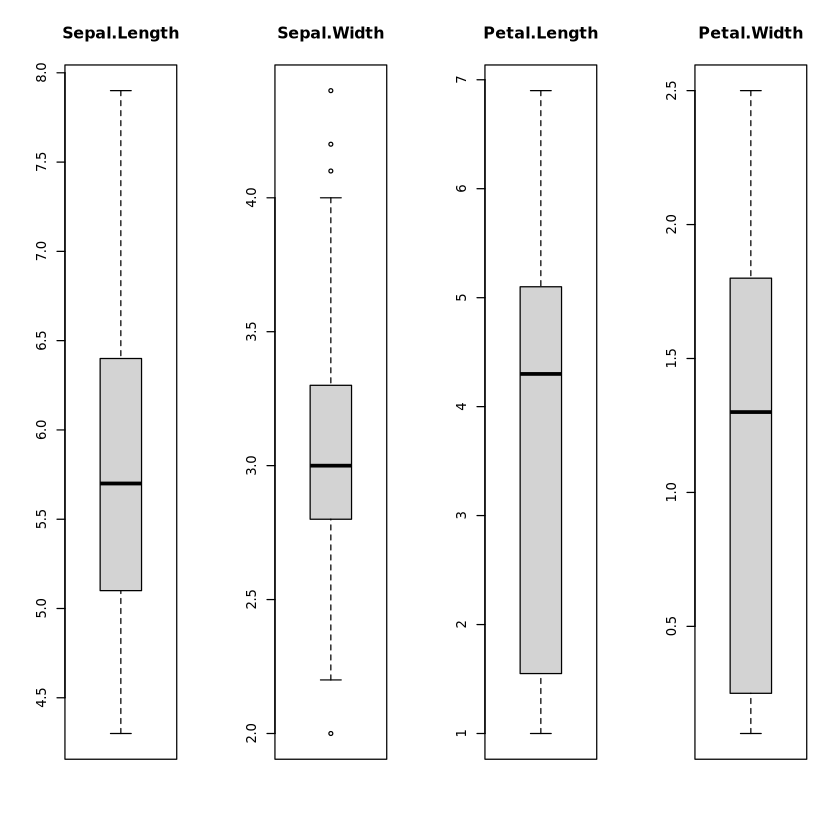

In [23]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

# Barplot for class breakdown

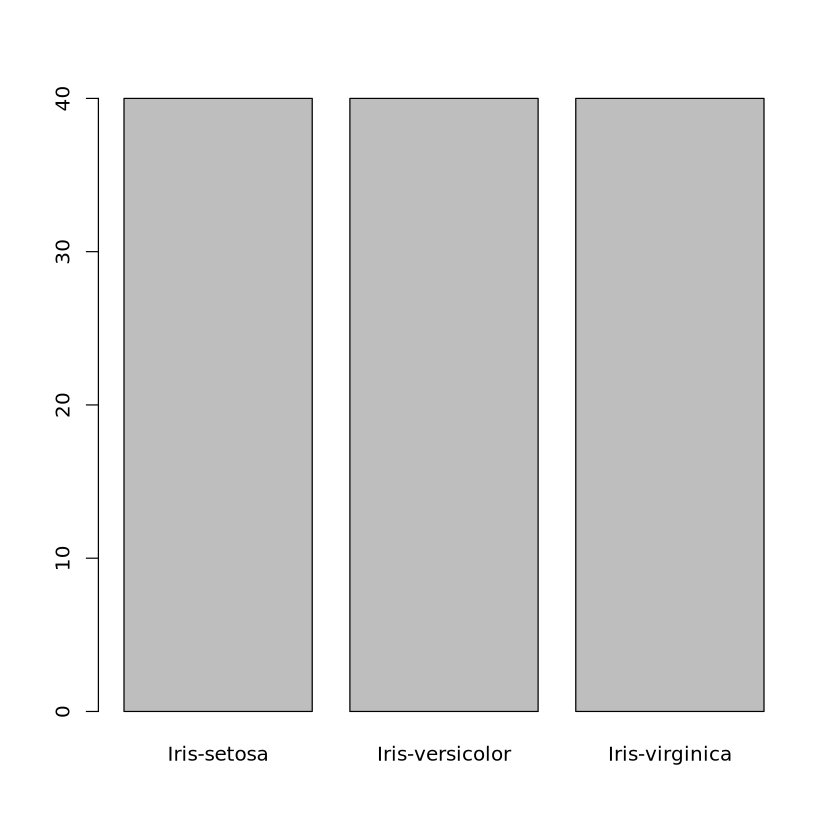

In [24]:
plot(y)

# Scatterplot matrix

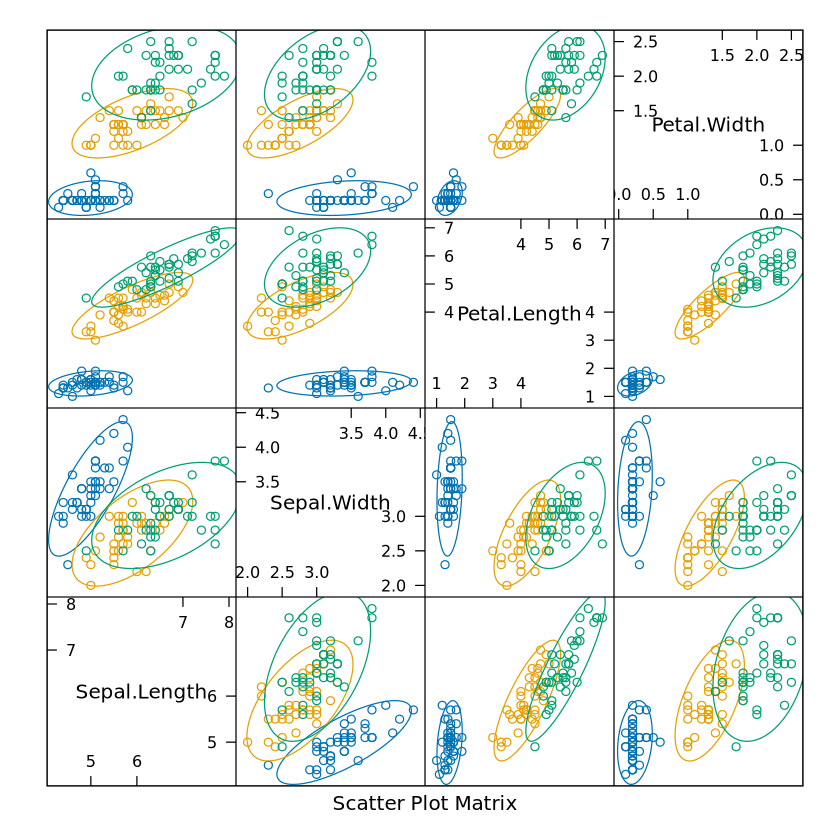

In [25]:
featurePlot(x=x, y=y, plot="ellipse")

# Box and whisker plots for each attribute

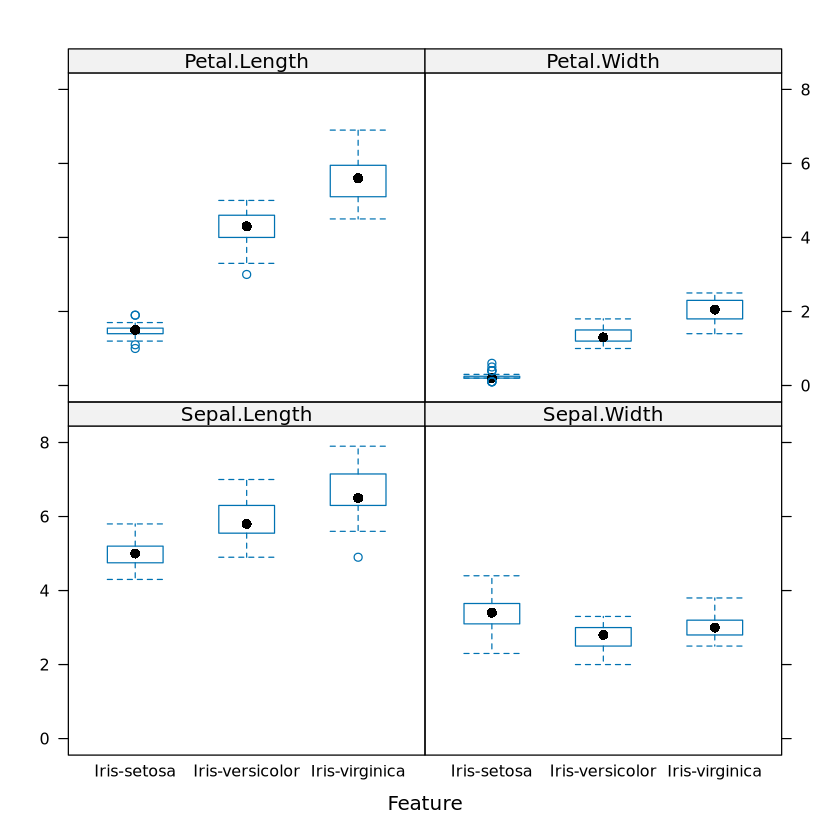

In [26]:
featurePlot(x=x, y=y, plot="box")

# Density plots for each attribute by class value

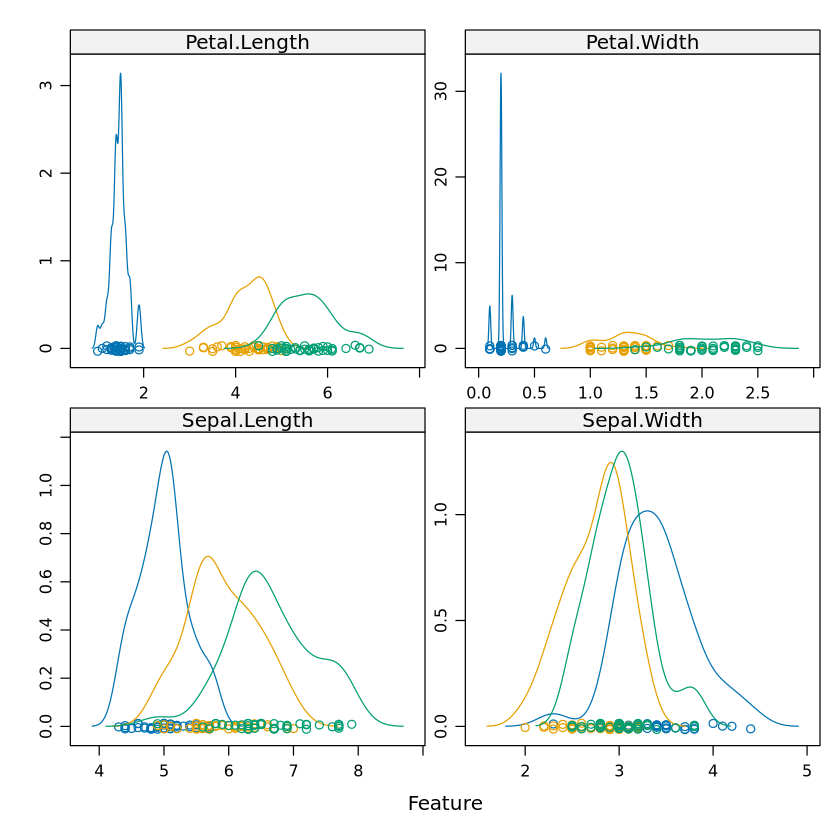

In [27]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

# 10-fold cross validation

# Running algorithms using 10-fold cross validation

In [28]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

# Building Models

## A) Linear algorithms

In [29]:
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

## B) Nonlinear algorithms
### CART

In [30]:
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

### kNN

In [31]:
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

## C) Advanced algorithms
### SVM

In [32]:
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

### Random Forest

In [33]:
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

# Summarization of accuracy of models

In [34]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
cart 0.8333333 0.8541667 0.9166667 0.9083333 0.9166667    1    0
knn  0.9166667 0.9375000 1.0000000 0.9750000 1.0000000    1    0
svm  0.8333333 0.9375000 1.0000000 0.9666667 1.0000000    1    0
rf   0.8333333 0.9166667 1.0000000 0.9500000 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000  1.000 0.9750   1.000    1    0
cart 0.750 0.78125  0.875 0.8625   0.875    1    0
knn  0.875 0.90625  1.000 0.9625   1.000    1    0
svm  0.750 0.90625  1.000 0.9500   1.000    1    0
rf   0.750 0.87500  1.000 0.9250   1.000    1    0


# Comparison of accuracy of models

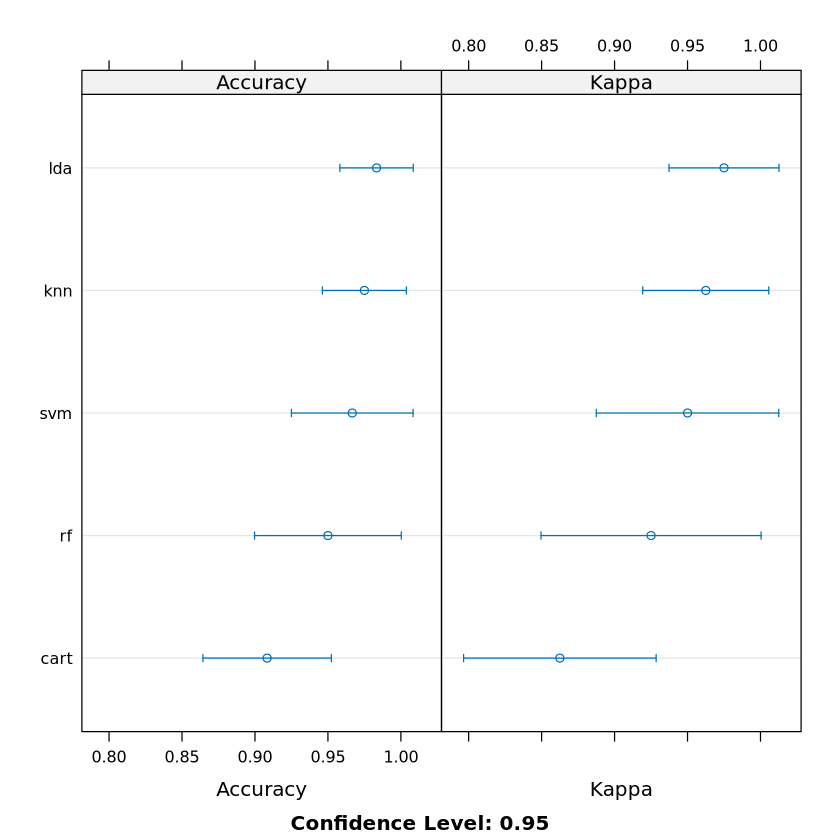

In [35]:
dotplot(results)

# Summarization of Best Model

In [36]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



# Estimate skill of LDA on the validation dataset

In [48]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               9              0
  Iris-virginica            0               1             10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 0.9000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value